In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
import seaborn as sns

In [4]:
! pip install codecarbon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.9/494.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.1 MB/s eta 0:00:00


In [5]:
from codecarbon import EmissionsTracker

codecarbon_output = "/content/drive/MyDrive/Trabalho Topicos IA1/codecarbon_emissions.csv"

# functions

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Topicos IA1/final_inmet_data.csv', sep=';')

In [ ]:
df.columns

Index(['Unnamed: 0', 'DATA', 'HORA',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'RADIACAO GLOBAL (KJ/m²)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'],
      dtype='object')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,DATA,HORA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),...,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"VENTO, VELOCIDADE HORARIA (m/s)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)",RADIACAO GLOBAL (KJ/m²),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
0,0,0,2007-05-18,00:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2007-05-18,01:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2007-05-18,02:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,2007-05-18,03:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,2007-05-18,04:00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147139,147139,147139,2024-02-28,05:00,25.7,26.3,25.6,99.0,99.0,97.0,...,26.0,25.3,1005.5,1006.6,1005.2,3.2,66.0,8.0,0.0,0.0
147140,147140,147140,2024-02-28,06:00,26.7,26.8,25.2,97.0,100.0,97.0,...,26.2,25.0,1005.1,1005.8,1005.0,1.7,352.0,6.3,0.0,0.0
147141,147141,147141,2024-02-28,07:00,26.9,26.9,26.3,95.0,97.0,95.0,...,26.1,25.7,1004.5,1005.2,1004.5,2.1,15.0,4.9,0.0,0.0
147142,147142,147142,2024-02-28,08:00,26.8,27.0,26.7,93.0,95.0,93.0,...,26.0,25.6,1003.2,1004.5,1003.1,3.3,349.0,8.0,0.0,0.0


In [ ]:
df.iloc[117715:117717]

,Unnamed: 0,DATA,HORA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"VENTO, VELOCIDADE HORARIA (m/s)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)",RADIACAO GLOBAL (KJ/m²),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
117715,117715,2020-10-20,500,22.2,22.6,22.0,76.0,79.0,74.0,17.8,18.5,17.7,1011.2,1011.7,1011.2,1.1,81.0,3.3,0.0,0.0
117716,117716,2020-10-20,600,21.9,22.4,21.9,77.0,78.0,76.0,17.8,18.2,17.6,1010.6,1011.2,1010.5,1.8,91.0,4.0,0.0,0.0


<Axes: >

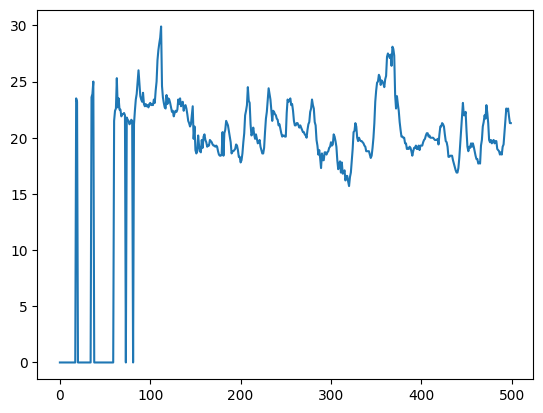

In [ ]:
df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'][:500].plot()

In [24]:
def split_train_test(df, column, date='2017-01-01', columns_to_remove=[]):
  df['DATA'] = pd.to_datetime(df['DATA'])
  df['datetime'] = pd.to_datetime(df['DATA'].astype(str) + ' ' + df['HORA'])
  if 'Unnamed: 0' in df.columns: df = df.drop(columns='Unnamed: 0')
  df.fillna(0)

  training_mask = df["datetime"] < date
  training_data = df.loc[training_mask]

  testing_mask = df["datetime"] >= date
  testing_data = df.loc[testing_mask]
  print(f'train= {training_data.shape} || test= {testing_data.shape}')

  testing_dates = testing_data["datetime"]

  figure, ax = plt.subplots(figsize=(20, 5))
  training_data.plot(ax=ax, label="Training", x="DATA", y=column)
  testing_data.plot(ax=ax, label="Testing", x="DATA", y=column)
  plt.show()

  X_train = training_data[training_data.columns.difference(['DATA', 'HORA', column] + columns_to_remove)]
  y_train = training_data[column]

  X_test = testing_data[testing_data.columns.difference(['DATA', 'HORA', column] + columns_to_remove)]
  y_test = testing_data[column]

  X_train = X_train.fillna(0)
  X_test = X_test.fillna(0)
  y_train = y_train.fillna(0)
  y_test = y_test.fillna(0)

  return X_train, y_train, X_test, y_test, testing_dates

In [17]:
def grid_search(X_train, y_train):
  model = XGBRegressor()

  # param_grid = {
  #   'n_estimators': [50, 100, 200],
  #   'max_depth': [3, 4, 5],
  #   'learning_rate': [0.01, 0.1, 0.2],
  #   'subsample': [0.7, 0.8, 0.9],
  #   'colsample_bytree': [0.7, 0.8, 0.9],
  #   'gamma': [0, 0.1, 0.2]
  # }

  param_grid = {
      'eta': [0.1, 0.2, 0.5],
      'colsample_bytree': [0.7],
      'gamma': [0],
      'learning_rate': [0.1],
      'max_depth': [3],
      'n_estimators': [100],
      'subsample': [0.8]
  }

  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
  grid_search.fit(X_train, y_train)

  print("Best parameters found: ", grid_search.best_params_)
  return grid_search.best_params_

In [7]:
def cross_validation(dtrain, params):
  num_folds = 5
  cv_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

  cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=100,
    nfold=num_folds,
    metrics={'logloss'},
    early_stopping_rounds=10,
    seed=42
  )

  print(cv_results)

  best_num_boost_rounds = cv_results['test-logloss-mean'].argmin()
  print(f"Best number of boosting rounds: {best_num_boost_rounds}")

  best_logloss_score = cv_results.loc[best_num_boost_rounds, 'test-logloss-mean']
  print(f"Best logloss score: {best_logloss_score}")

  return best_num_boost_rounds

In [8]:
def train(dtrain, dtest, params, num_boost_rounds):

  model = xgb.train(params, dtrain, num_boost_round=num_boost_rounds)

  predictions = model.predict(dtest)

  return model, predictions

In [9]:
def plot_feature_importance(model):
  plot_importance(model, height=0.9)

In [10]:
def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MRSE: {np.sqrt(mean_squared_error(y_test, prediction))}")

In [11]:
def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"Data": testing_dates, "actual": y_test, "Predição": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Correto", x="Data", y="actual")
  df_test.plot(ax=ax, style='-', label="Prediction", x="Data", y="Predição")
  plt.legend(["Correto", "Predição"])
  plt.show()

# XGBoost Train

In [ ]:
df.columns

Index(['DATA', 'HORA', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (KJ/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'],
      dtype='object')

## radiation

train= (84384, 19) || test= (17520, 19)


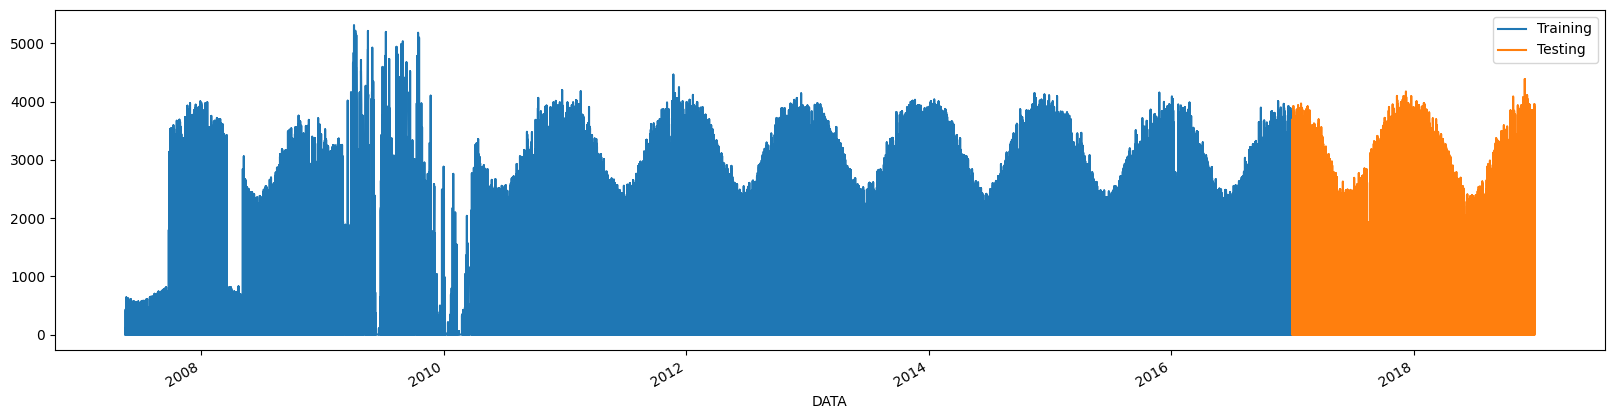

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:11:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


MAE: 468.8607616930901
MSE: 452294.5340921812
MRSE: 672.528463406703


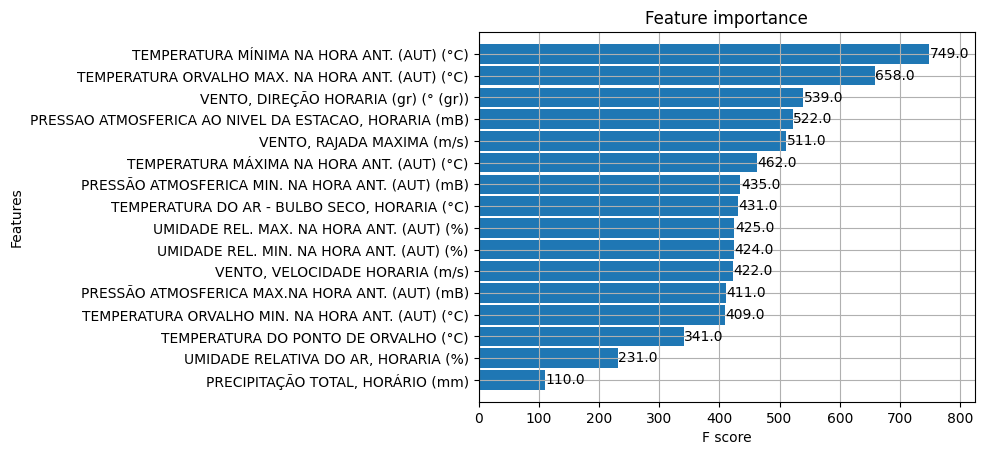

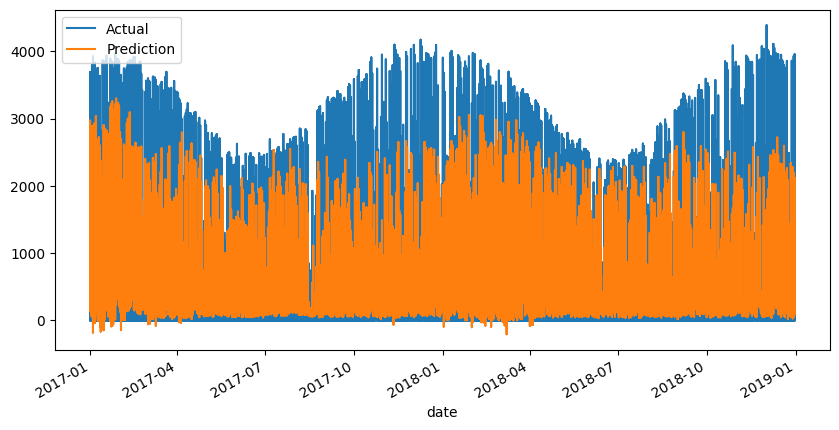

emissions=3.833211707062307e-05


In [ ]:
tracker = EmissionsTracker(
    project_name="treino com xgboost radiation xgb",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()

X_train, y_train, X_test, y_test, testing_dates = split_train_test(df, column='RADIACAO GLOBAL (KJ/m²)')

dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test)

# params = grid_search(X_train, y_train)
params = {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 1.0}

cross_validation(dtrain, params)

radiation_model, predictions = train(X_train=X_train, X_test=X_test, y_train=y_train, params=params)

plot_feature_importance(model=radiation_model)

evaluate_model(y_test, predictions)

plot_predictions(testing_dates, y_test, predictions)

emissions: float = tracker.stop()
print(f"emissions={emissions}")

## temperature

train= (117696, 21) || test= (29448, 21)


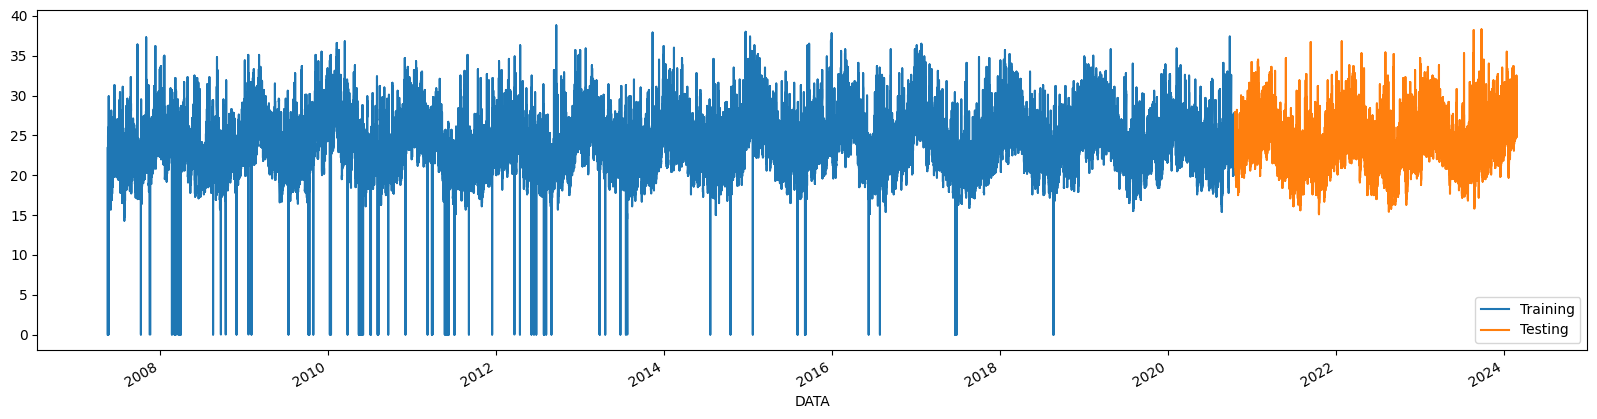

MAE: 1.4574720090447932
MSE: 3.489106581429247
MRSE: 1.867915035923542


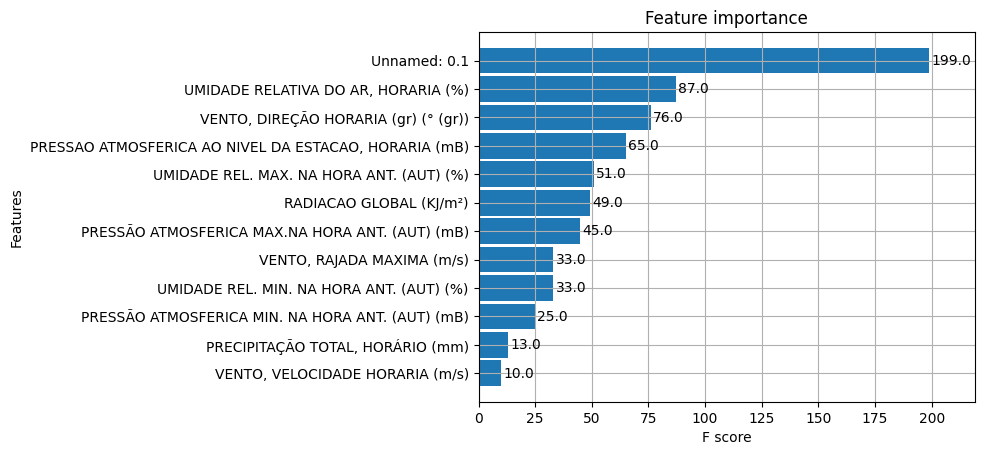

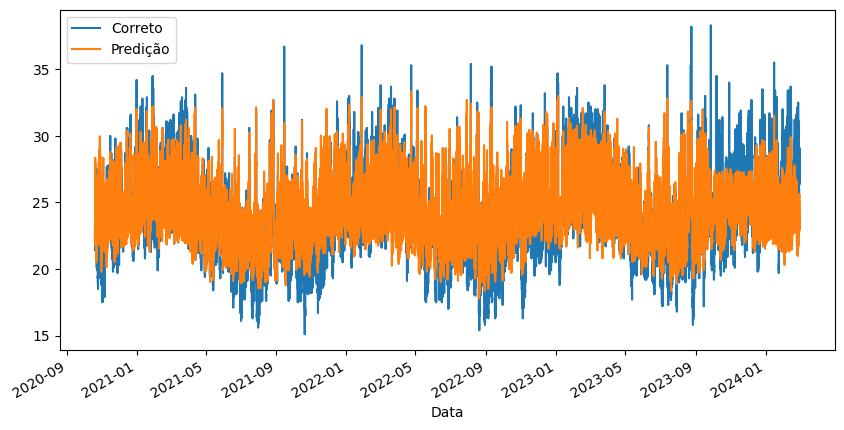

emissions=3.417630680192947e-07


In [25]:
tracker = EmissionsTracker(
    project_name="treino com xgboost temperature xgb",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()

X_train, y_train, X_test, y_test, testing_dates = \
        split_train_test(df, column='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
                         date='2020-10-20',
                         columns_to_remove=['datetime',
                                            'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
                                            'TEMPERATURA DO PONTO DE ORVALHO (°C)',
                                            'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
                                            'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
                                            'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
                                            'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'])

dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test)

# params = grid_search(X_train, y_train)
params = {'eta': 0.1, 'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}

# num_boost_rounds = cross_validation(dtrain, params)
num_boost_rounds = 98

radiation_model, predictions = train(dtrain, dtest, params=params, num_boost_rounds=num_boost_rounds)

plot_feature_importance(model=radiation_model)

evaluate_model(y_test, predictions)

plot_predictions(testing_dates, y_test, predictions)

emissions: float = tracker.stop()
print(f"emissions={emissions}")

<Axes: >

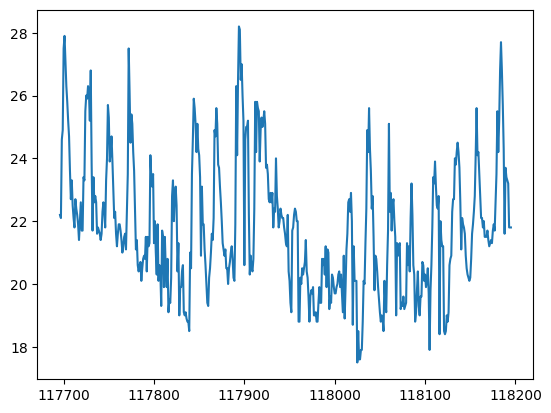

In [ ]:
y_test[:500].plot()

In [ ]:
predictions[:500].plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [23]:
testing_dates

117696   2020-10-20
117697   2020-10-20
117698   2020-10-20
117699   2020-10-20
117700   2020-10-20
            ...    
147139   2024-02-28
147140   2024-02-28
147141   2024-02-28
147142   2024-02-28
147143   2024-02-28
Name: DATA, Length: 29448, dtype: datetime64[ns]

ValueError: Unable to parse string "00:00" at position 400

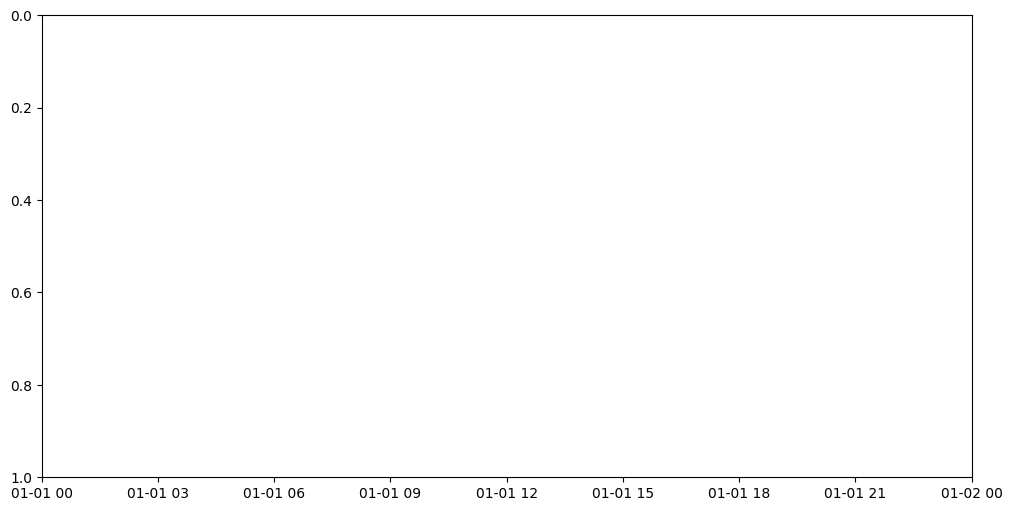

In [ ]:
df_plot = pd.DataFrame({
    'DATA': testing_dates,
    'Actual': y_test,
    'Predicted': predictions
})

# Select a small range of data
sample_range = 400
results = df.iloc[:sample_range]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATA', y='value', hue='variable',
             data=pd.melt(results, ['DATA']))
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Legend', labels=['Actual', 'Predicted'])
plt.show()

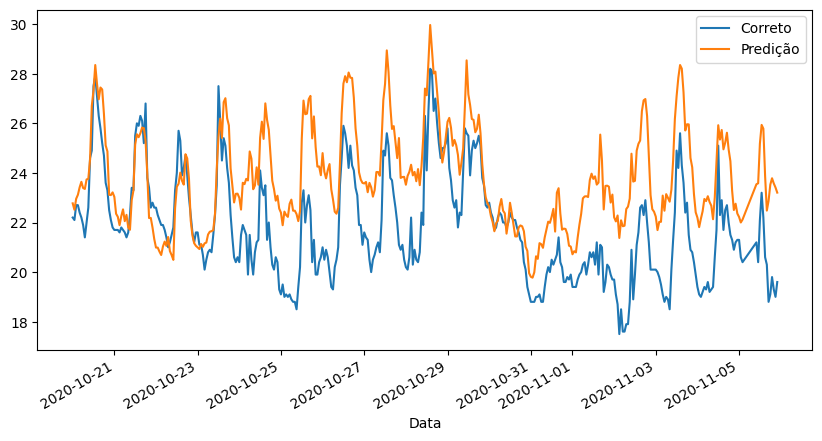

In [32]:
plot_predictions(testing_dates[:400], y_test[:400], predictions[:400])

## humidity

train= (84384, 19) || test= (17520, 19)


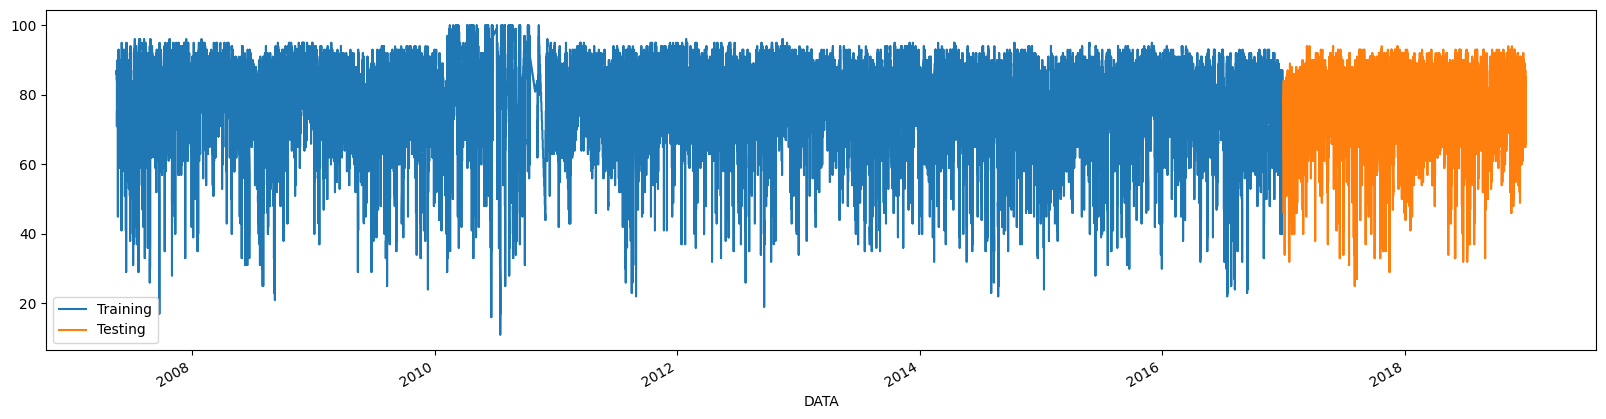

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


In [ ]:
tracker = EmissionsTracker(
    project_name="treino com xgboost humidity xgb",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()

X_train, y_train, X_test, y_test, testing_dates = \
        split_train_test(df, column='UMIDADE RELATIVA DO AR, HORARIA (%)',
                         columns_to_remove=['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
                                            'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
                                            'UMIDADE RELATIVA DO AR, HORARIA (%)'])

dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test)

params = grid_search(X_train, y_train)
# params = {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 1.0}

num_boost_rounds = cross_validation(dtrain, params)

radiation_model, predictions = train(dtrain, dtest, params=params, num_boost_rounds=num_boost_rounds)

plot_feature_importance(model=radiation_model)

evaluate_model(y_test, predictions)

plot_predictions(testing_dates, y_test, predictions)

emissions: float = tracker.stop()
print(f"emissions={emissions}")

## pressão atmosferica

In [ ]:
tracker = EmissionsTracker(
    project_name="treino com xgboost pressao xgb",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()

X_train, y_train, X_test, y_test, testing_dates = \
        split_train_test(df, column='PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
                         columns_to_remove=['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
                                            'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
                                            'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'])

dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test)

params = grid_search(X_train, y_train)
# params = {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 1.0}

num_boost_rounds = cross_validation(dtrain, params)

radiation_model, predictions = train(dtrain, dtest, params=params, num_boost_rounds=num_boost_rounds)

plot_feature_importance(model=radiation_model)

evaluate_model(y_test, predictions)

plot_predictions(testing_dates, y_test, predictions)

emissions: float = tracker.stop()
print(f"emissions={emissions}")